In [115]:
#1. What is the range of selling prices in the dataset??

from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

# Calculate the range of selling prices
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

min_price, max_price, price_range



(5000, 760000, 755000)

In [ ]:
#2.  What is the median selling price for bikes in the dataset?

# Calculate the median selling price
median_price = df['selling_price'].median()
median_price



45000.0

In [ ]:
#3. What is the most common seller type?

most_common_seller_type = df['seller_type'].mode()[0]
most_common_seller_type


'Individual'

In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?
count = (df['km_driven'] > 50000).sum()

print("Number of bikes driven more than 50,000 km:", count)

Number of bikes driven more than 50,000 km: 170


In [ ]:
#5. What is the average km_driven value for each ownership type?

average_km_by_owner = df.groupby('owner')['km_driven'].mean()

print(average_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?

# Filter bikes from year 2015 or older
older_bikes = df[df['year'] <= 2015]

# Calculate proportion
proportion = len(older_bikes) / len(df)

# Display as percentage
print("Proportion of bikes from 2015 or older: {:.2%}".format(proportion))

Proportion of bikes from 2015 or older: 56.64%


In [ ]:
#7.What is the trend of missing values across the dataset?

# Count of missing values per column
missing_counts = df.isnull().sum()

# Percentage of missing values per column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Combine into one DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Count', ascending=False)

print(missing_summary)

                   Missing Count  Missing Percentage
ex_showroom_price            435                41.0
selling_price                  0                 0.0
name                           0                 0.0
year                           0                 0.0
seller_type                    0                 0.0
owner                          0                 0.0
km_driven                      0                 0.0


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

#Find the row with the maximum ex_showroom_price
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]

# Display the bike and price
bike_name = max_price_row['name']  # replace 'bike_name' with actual column name for bike
max_price = max_price_row['ex_showroom_price']

print(f"The highest ex_showroom_price is ₹{max_price:,} for the bike: {bike_name}")

The highest ex_showroom_price is ₹1,278,000.0 for the bike: Harley-Davidson Street Bob


In [ ]:
#9. What is the total number of bikes listed by each seller type?

seller_counts = df['seller_type'].value_counts()

print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


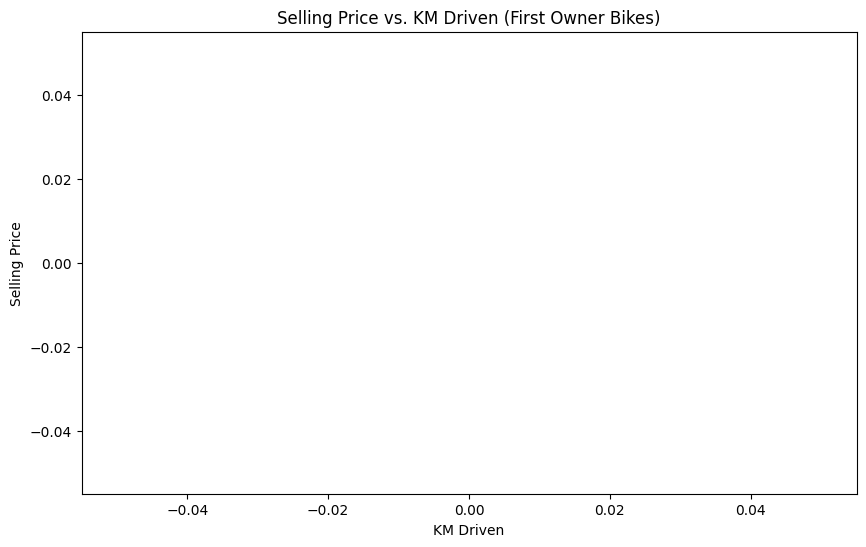

Correlation between selling_price and km_driven (First Owner): nan


In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_df = df[df['owner'] == 'First Owner']
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price', alpha=0.6)
plt.title('Selling Price vs. KM Driven (First Owner Bikes)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()
correlation = first_owner_df['selling_price'].corr(first_owner_df['km_driven'])
print(f"Correlation between selling_price and km_driven (First Owner): {correlation:.2f}")


In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

# Step 1: Calculate Q1 and Q3 for 'km_driven'
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 4: Check how many rows were removed
removed_count = df.shape[0] - df_no_outliers.shape[0]
print(f"Removed {removed_count} outliers from 'km_driven' column.")


Removed 39 outliers from 'km_driven' column.


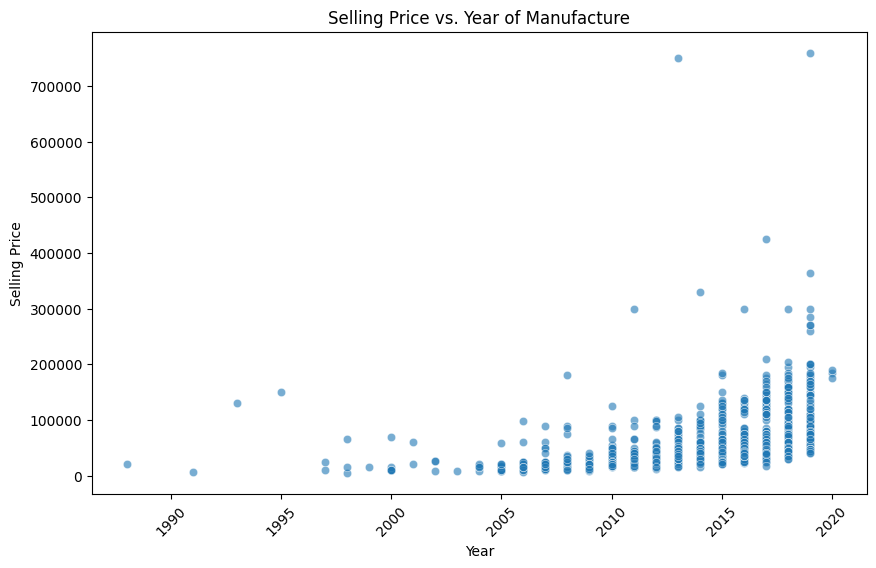

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

# Scatter Plot: Selling Price vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.6)
plt.title('Selling Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year?

import pandas as pd
from datetime import datetime

# Simulate loading a dataset (replace with actual path in practice)
# For now, create a small sample to simulate
data = {
    'year': [2015, 2017, 2018, 2020, 2022],
    'selling_price': [55000, 75000, 88000, 120000, 150000]
}
df = pd.DataFrame(data)

# Step 1: Calculate bike age
current_year = datetime.now().year
df['age'] = current_year - df['year']

# Step 2: Calculate average depreciation per year
# Sort by age for clarity
df_sorted = df.sort_values('age')

# Group by age and get average selling price
avg_price_by_age = df_sorted.groupby('age')['selling_price'].mean().reset_index()

avg_price_by_age.head()  # Display result for plotting



,age,selling_price
0,3,150000.0
1,5,120000.0
2,7,88000.0
3,8,75000.0
4,10,55000.0


In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?

import pandas as pd

# Clean column names (remove spaces, lower case)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop rows with missing selling_price or year
df = df.dropna(subset=['selling_price', 'year', 'name'])

# Group by 'year' and calculate mean and std deviation of selling_price
yearly_stats = df.groupby('year')['selling_price'].agg(['mean', 'std']).reset_index()
yearly_stats.rename(columns={'mean': 'year_avg_price', 'std': 'year_price_std'}, inplace=True)

# Merge the stats back to original dataframe
df = df.merge(yearly_stats, on='year', how='left')

# Filter bikes priced significantly above average (e.g., > mean + std)
df_above_avg = df[df['selling_price'] > df['year_avg_price'] + df['year_price_std']]

# Show unique bike names with high prices
unique_bikes_above_avg = df_above_avg['name'].unique()

print("Bike names priced significantly above average for their manufacturing year:")
for name in unique_bikes_above_avg:
    print(name)


Bike names priced significantly above average for their manufacturing year:
Royal Enfield Classic Gunmetal Grey
Royal Enfield Bullet 350 [2007-2011]
Yamaha YZF R3
Royal Enfield Thunderbird 350
Honda CBR-250R
KTM 390 Duke
Royal Enfield Electra 5 S
Royal Enfield Bullet 350
Royal Enfield Electra 4 S
Mahindra Mojo XT300
Royal Enfield Thunderbird 350X
Royal Enfield Classic Desert Storm
UM Renegade Commando
Royal Enfield Continental GT 650
Harley-Davidson Street Bob
KTM 390 Duke ABS [2013-2016]
Bajaj Dominar 400
KTM RC 390
Bajaj Pulsar 150
KTM RC 200
Royal Enfield Classic 350
Honda CB Unicorn 150
Royal Enfield Bullet 500
Bajaj Dominar 400 [2018]
Royal Enfield Interceptor 650
Royal Enfield Machismo
Kawasaki Ninja 650 [2018-2019]
Kawasaki Ninja 250R
Suzuki GSX S750
Yamaha Rx
Yamaha Fazer Dlx
Harley-Davidson Street 750
BMW G310GS
Royal Enfield Thunderbird 500
Royal Enfield Himalayan
Yamaha FZ25
Royal Enfield Classic Stealth Black
Royal Enfield Classic Squadron Blue
KTM 200 Duke
Royal Enfield Cl

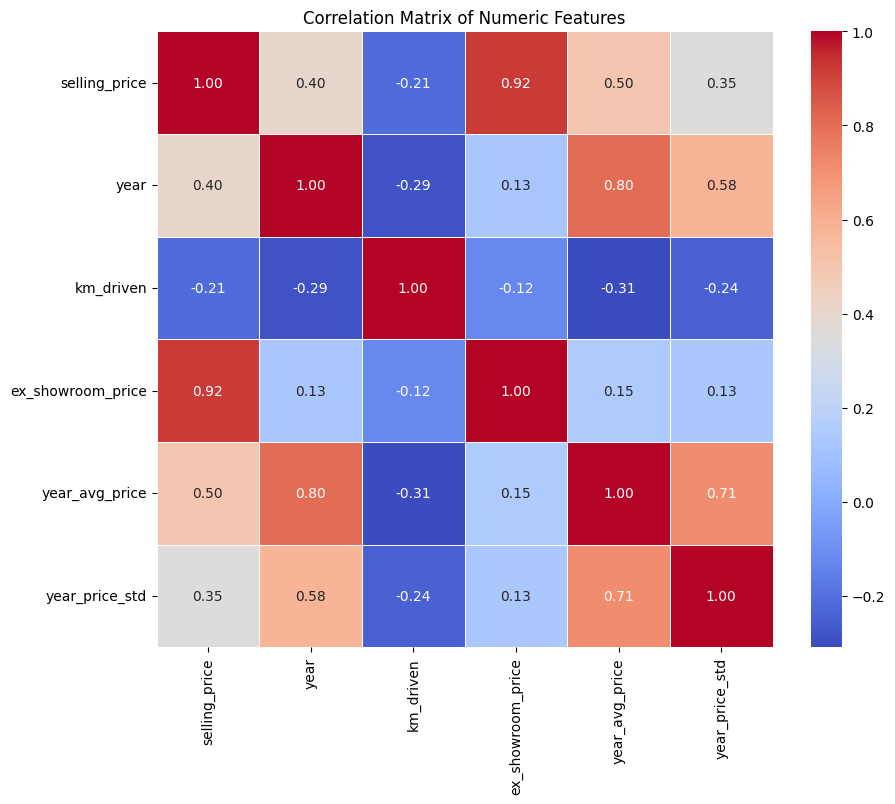

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Set plot size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Add title
plt.title("Correlation Matrix of Numeric Features")

# Show the plot
plt.show()


EDA-2

In [1]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?


from google.colab import files
uploaded = files.upload()


Saving Car Sale.csv to Car Sale.csv


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


dealer_name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

<ipython-input-7-1708484d21c4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_dealer.index, y=avg_price_per_dealer.values, palette='viridis')


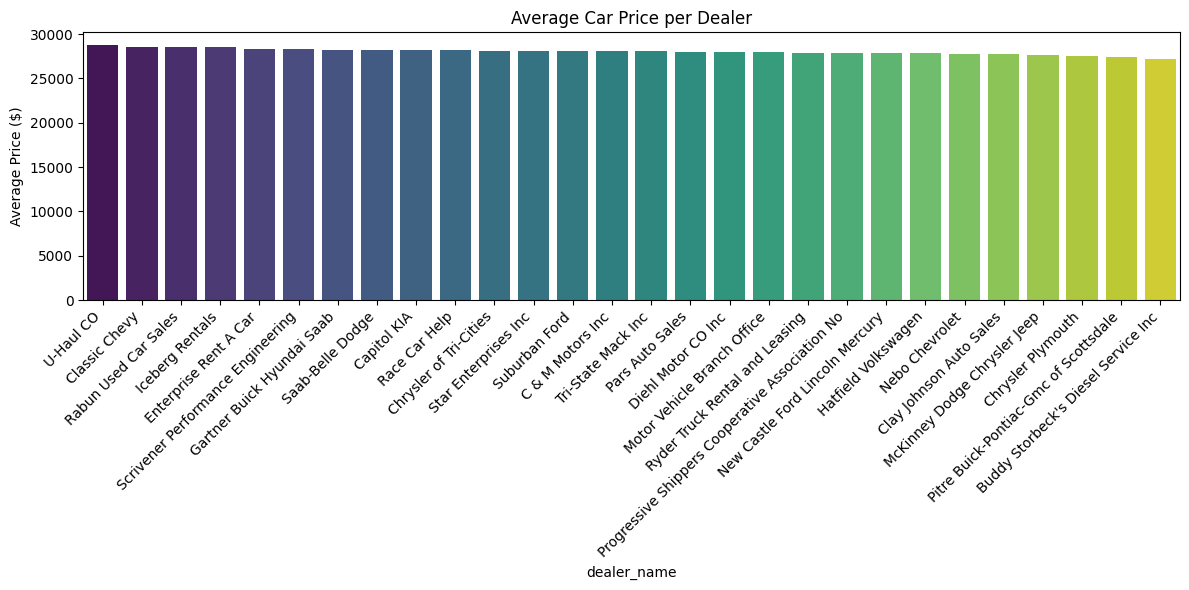

In [ ]:
# Replace 'price_column_name_here' with the actual name (e.g., 'price', 'price_$', etc.)
avg_price_per_dealer = df.groupby('dealer_name')['price_($)'].mean().sort_values(ascending=False)

# Display results
print(avg_price_per_dealer)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_dealer.index, y=avg_price_per_dealer.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price per Dealer')
plt.tight_layout()
plt.show()


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')
company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Buick       17142.232626
Mercury     16445.172195
Nissan      16214.264017
Saturn      15990.223671
Ford        15849.090227
Name: price_($), dtype: float64


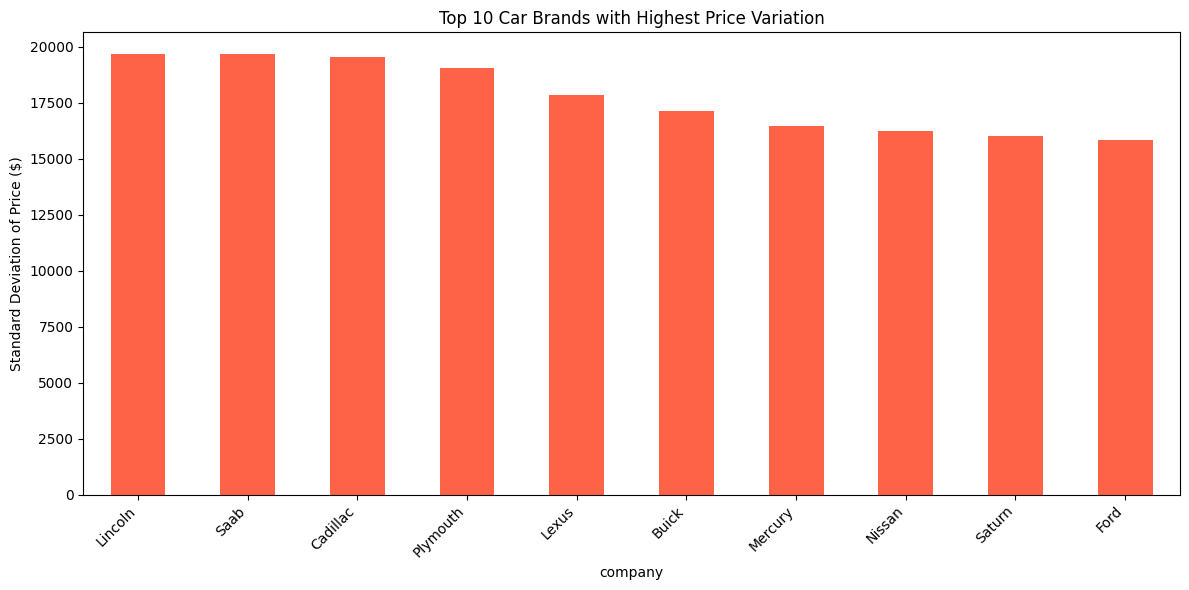

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?

import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('Car Sale.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check columns to find the correct ones
print(df.columns)


# Group by company and calculate standard deviation of prices
price_variation = df.groupby('company')['price_($)'].std().sort_values(ascending=False)

# Display top brands with highest price variation
print(price_variation.head(10))

# Plot
plt.figure(figsize=(12,6))
price_variation.head(10).plot(kind='bar', color='tomato')
plt.ylabel('Standard Deviation of Price ($)')
plt.title('Top 10 Car Brands with Highest Price Variation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


<ipython-input-13-aa2ab56e88fe>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='transmission', y='price_($)', palette='Set2')


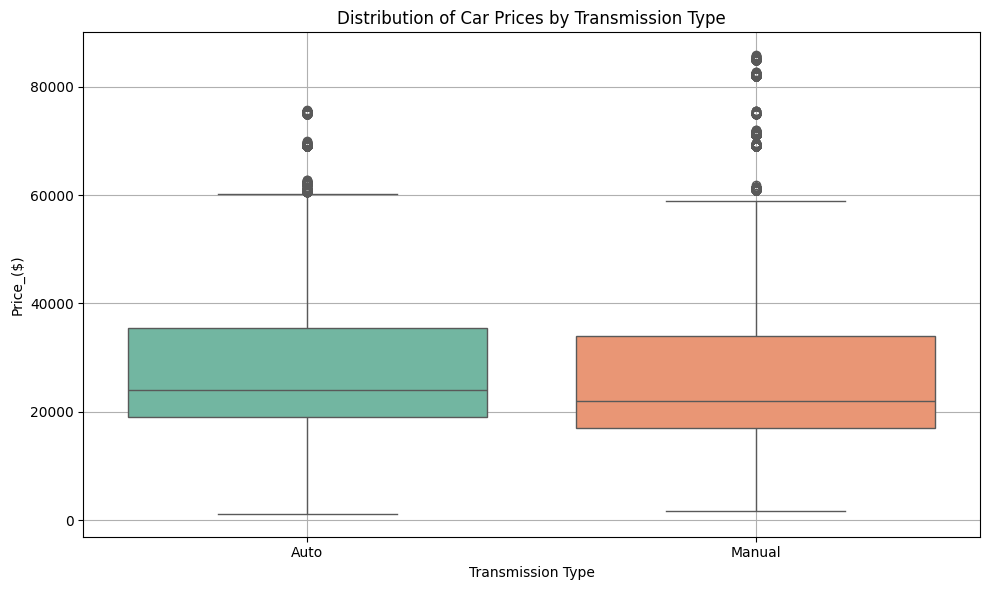

Interquartile Ranges by Transmission Type:
                   Q1       Q3      IQR
transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


In [ ]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check column names to identify transmission and price columns
print(df.columns)

# Boxplot to visualize price distribution by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='price_($)', palette='Set2')
plt.title('Distribution of Car Prices by Transmission Type')
plt.ylabel('Price_($)')
plt.xlabel('Transmission Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate IQR for each transmission type
iqr_data = df.groupby('transmission')['price_($)'].agg(
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)
iqr_data['IQR'] = iqr_data['Q3'] - iqr_data['Q1']

print("Interquartile Ranges by Transmission Type:")
print(iqr_data)


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


<ipython-input-15-41a9bd1dd44f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dealer_region', y='price_($)', palette='coolwarm')


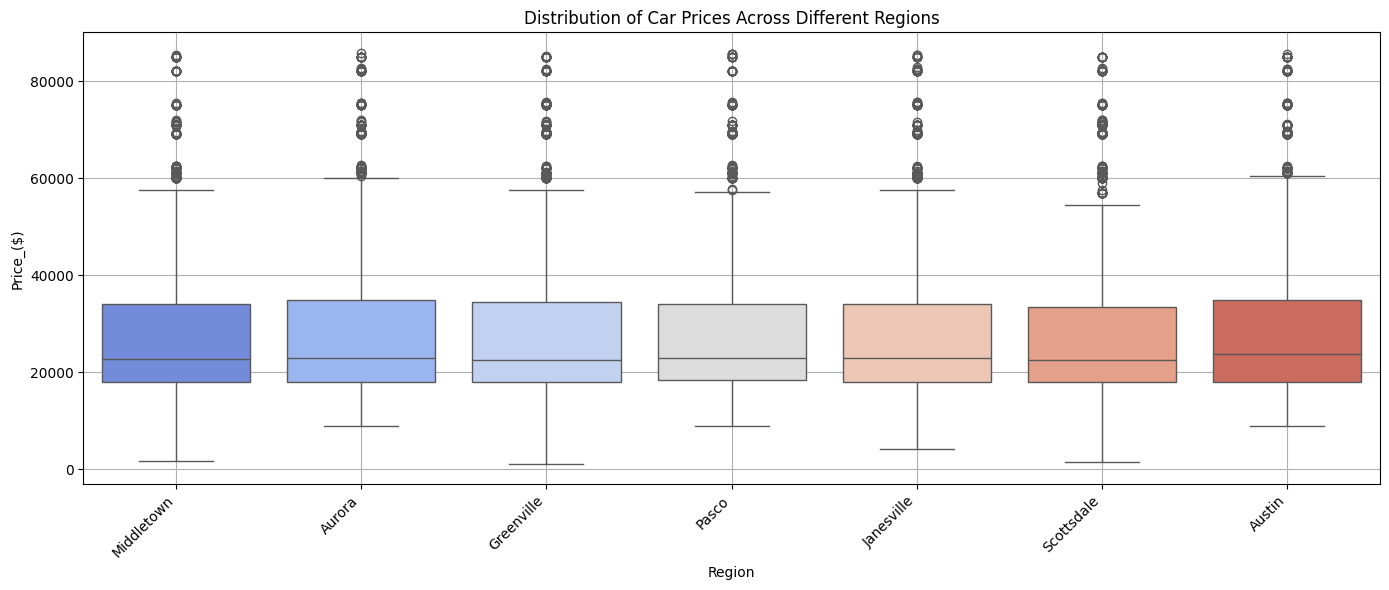

In [ ]:
#4. What is the distribution of car prices across different regions?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv('Car Sale.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check column names to confirm the correct ones for region and price
print(df.columns)

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='dealer_region', y='price_($)', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Price_($)')
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


<ipython-input-17-3431331ca212>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='body_style', order=df['body_style'].value_counts().index, palette='pastel')


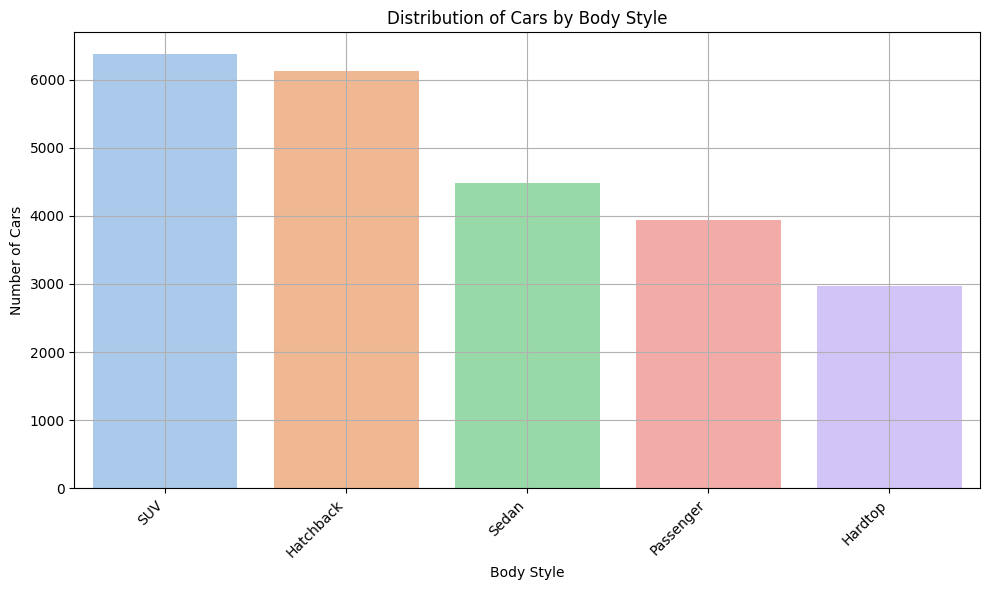

In [ ]:
#5. What is the distribution of cars based on body styles?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv('Car Sale.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check column names to find the one representing body style
print(df.columns)

# Count plot for body style
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='body_style', order=df['body_style'].value_counts().index, palette='pastel')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


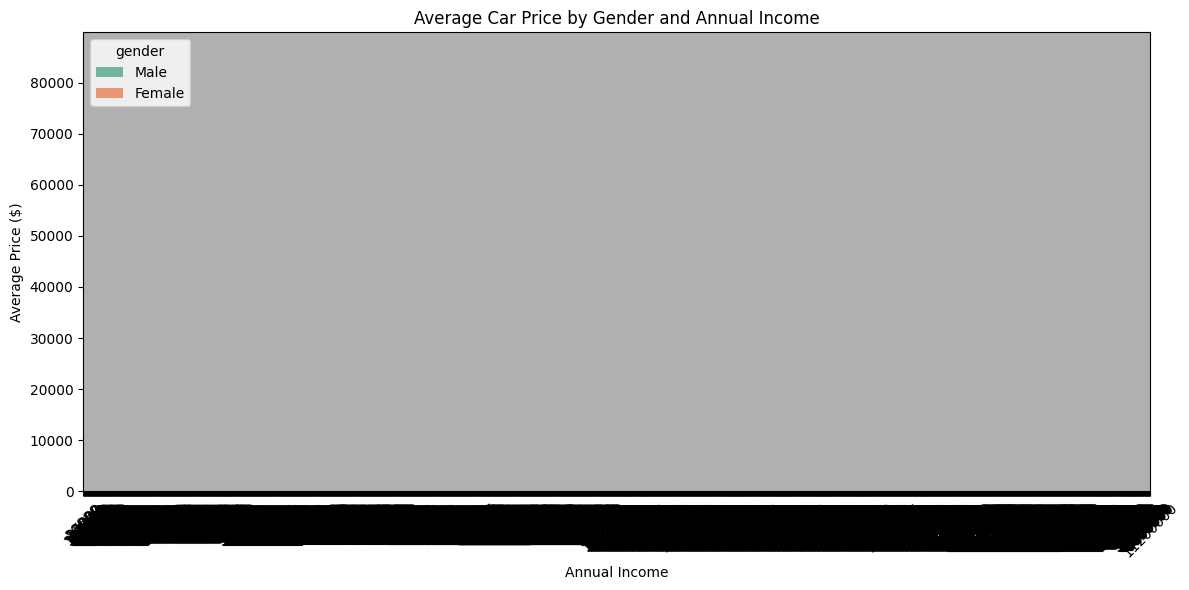

In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?
import pandas as pd

df = pd.read_csv('Car Sale.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)
import seaborn as sns
import matplotlib.pyplot as plt
# Group by gender and annual income to find average car price
avg_price_by_gender_income = df.groupby(['gender', 'annual_income'])['price_($)'].mean().reset_index()

# Bar plot to show comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_gender_income, x='annual_income', y='price_($)', hue='gender', palette='Set2')
plt.title('Average Car Price by Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


<ipython-input-22-fb1d1e3f60ab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dealer_region', y='price_($)', palette='coolwarm')


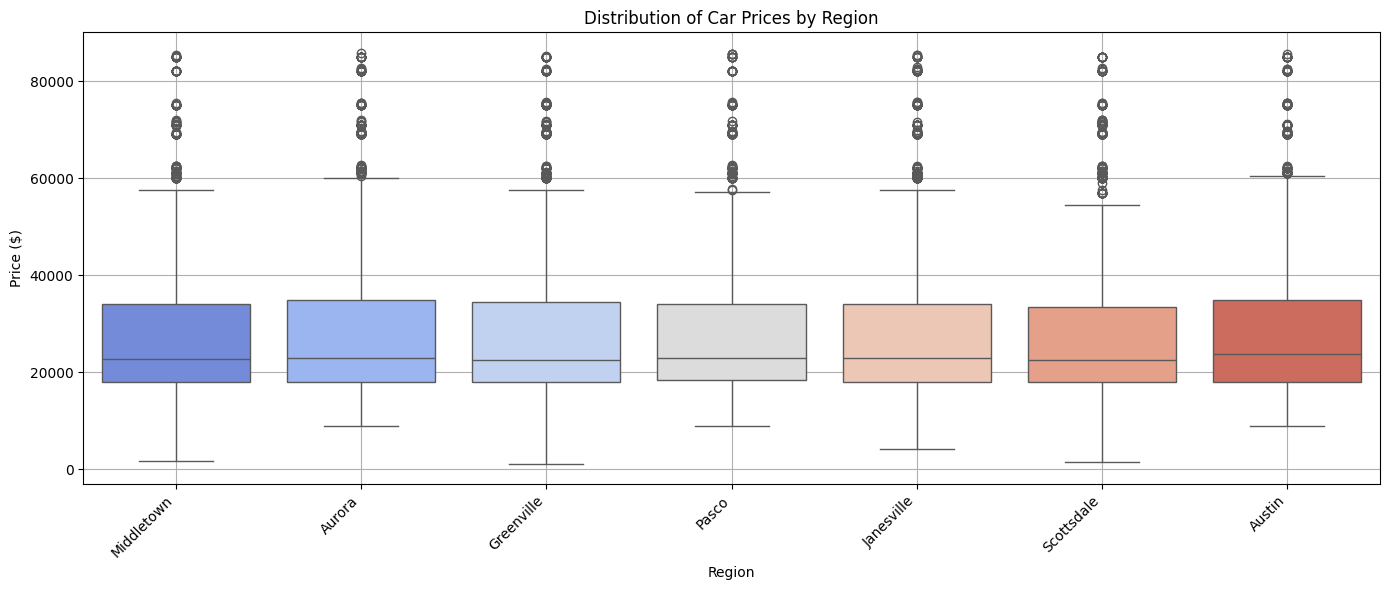

In [ ]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
import pandas as pd

df = pd.read_csv('Car Sale.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to show price distribution by region
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='dealer_region', y='price_($)', palette='coolwarm')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')
         car_id      date customer_name gender  annual_income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           dealer_name   company       model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acur

<ipython-input-11-9d7e448491ae>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='engine', y='price_($)', data=avg_price_by_engine, palette='viridis')


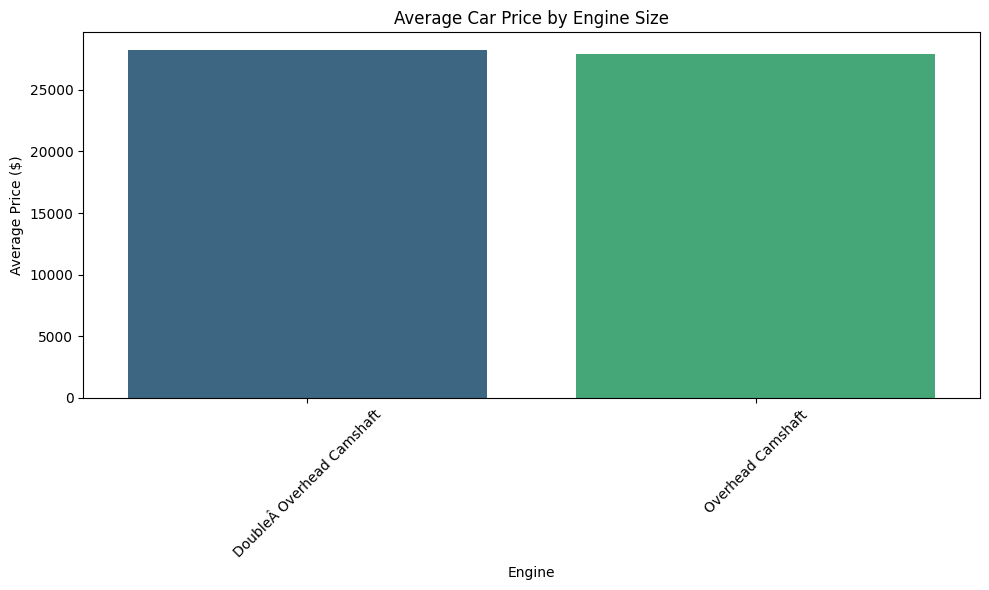

In [11]:
#8. How does the average car price differ between cars with different engine sizes?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Car Sale.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# View column names to find correct ones
print(df.columns)

# Check a few rows
print(df.head())

# Drop rows with missing engine size or price
df = df.dropna(subset=['engine', 'price_($)'])  # Adjust 'engine_size' and 'price_$' as needed

# Convert price to numeric (in case it's object/string type)
df['price_($)'] = pd.to_numeric(df['price_($)'], errors='coerce')

# Group by engine size and calculate average price
avg_price_by_engine = df.groupby('engine')['price_($)'].mean().reset_index()

# Sort for better visualization
avg_price_by_engine = avg_price_by_engine.sort_values('engine')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='engine', y='price_($)', data=avg_price_by_engine, palette='viridis')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')
   annual_income  price_($)
0          13500      26000
1        1480000      19000
2        1035000      31500
3          13500      14000
4        1465000      24500


<ipython-input-13-ddcf3f16a7af>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby('income_bracket')['price_($)'].mean().reset_index()
<ipython-input-13-ddcf3f16a7af>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_bracket', y='price_($)', data=avg_price_by_income, palette='coolwarm')


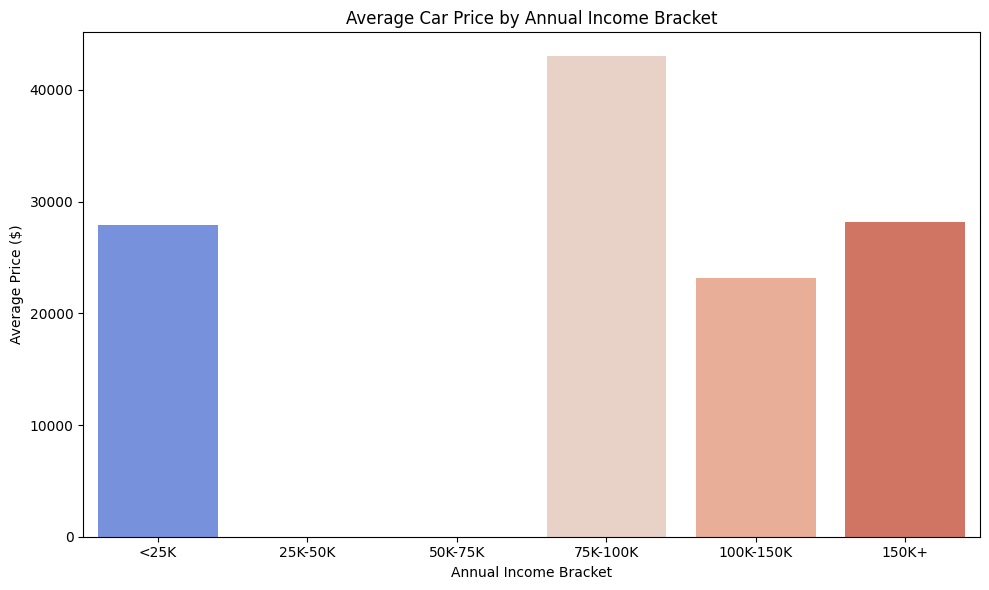

In [13]:
#9. How do car prices vary based on the customer’s annual income bracket?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)
# Preview data

print(df[['annual_income', 'price_($)']].head())  # Adjust column names based on actual dataset

# Convert to numeric if needed
df['annual_income'] = pd.to_numeric(df['annual_income'], errors='coerce')
df['price_($)'] = pd.to_numeric(df['price_($)'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['annual_income', 'price_($)'])

# Create income brackets (adjust bins as needed)
bins = [0, 25000, 50000, 75000, 100000, 150000, float('inf')]
labels = ['<25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', '150K+']
df['income_bracket'] = pd.cut(df['annual_income'], bins=bins, labels=labels)

# Group by income bracket
avg_price_by_income = df.groupby('income_bracket')['price_($)'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='income_bracket', y='price_($)', data=avg_price_by_income, palette='coolwarm')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()



Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


<ipython-input-15-8297497d763c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['price_($)'] = pd.to_numeric(top_df['price_($)'], errors='coerce')  # Replace with correct column name
<ipython-input-15-8297497d763c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='price_($)', data=top_df, palette='Set2')  # or use violinplot


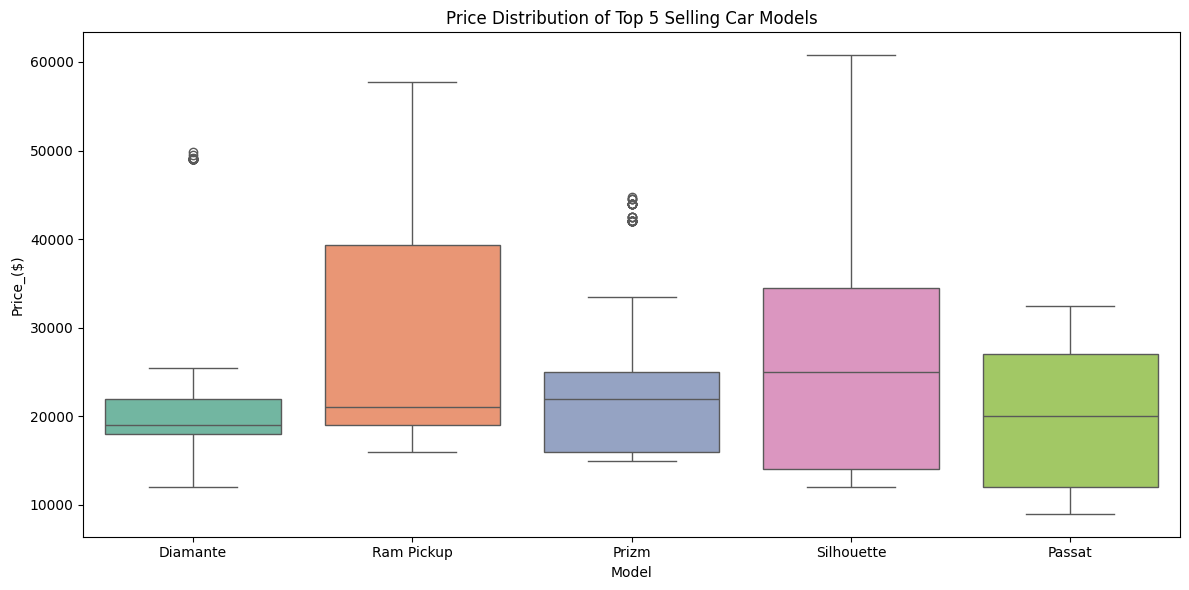

In [15]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Car Sale.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)  # Check for actual names like 'model' or 'car_name'

# Count top 5 models by number of sales
top_models = df['model'].value_counts().head(5).index.tolist()  # Replace 'car_model' if needed

# Filter for top 5 models
top_df = df[df['model'].isin(top_models)]

# Convert price to numeric
top_df['price_($)'] = pd.to_numeric(top_df['price_($)'], errors='coerce')  # Replace with correct column name

# Drop rows with missing prices
top_df = top_df.dropna(subset=['price_($)'])

# Plot price distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='price_($)', data=top_df, palette='Set2')  # or use violinplot
plt.title('Price Distribution of Top 5 Selling Car Models')
plt.xlabel('Model')
plt.ylabel('Price_($)')
plt.tight_layout()
plt.show()


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


<ipython-input-21-fb7020864e8d>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Car Color', bbox_to_anchor=(1.05, 1), loc='upper left')


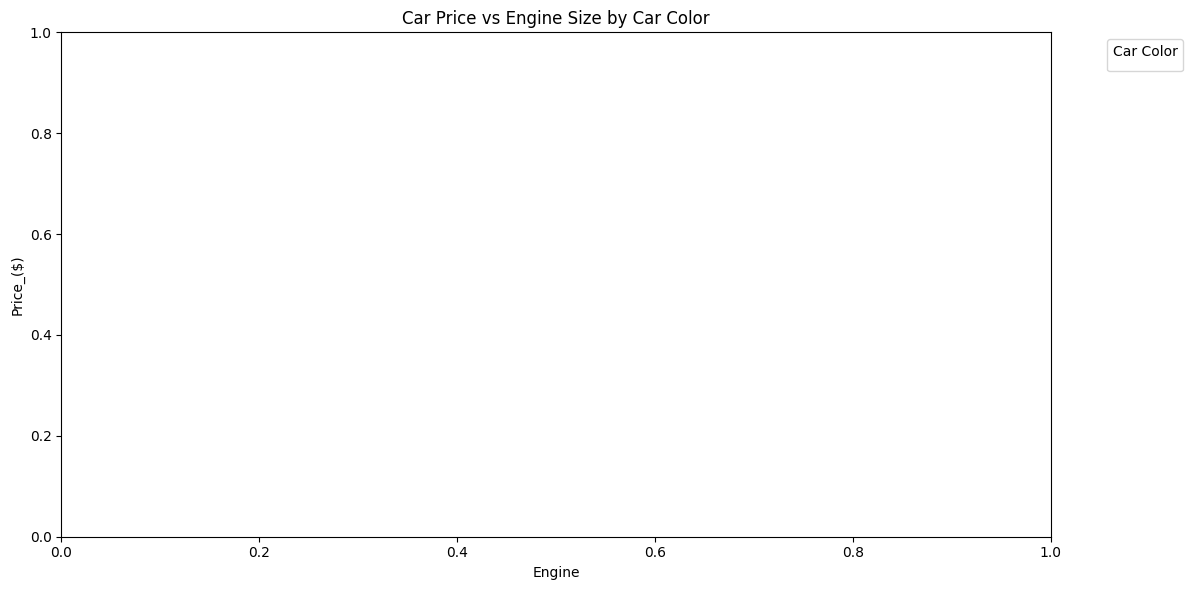

In [21]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variations?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Clean columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

# Convert types
df['price_($)'] = pd.to_numeric(df['price_($)'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['price_($)', 'engine', 'color'])

# Plot: Price vs Engine Size by Car Color (Hue)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='engine', y='price_($)', hue='color', alpha=0.7)
plt.title('Car Price vs Engine Size by Car Color')
plt.xlabel('Engine')
plt.ylabel('Price_($)')
plt.legend(title='Car Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


<ipython-input-22-9482f8a6a25a>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='sales_count', data=monthly_sales, palette='Spectral')


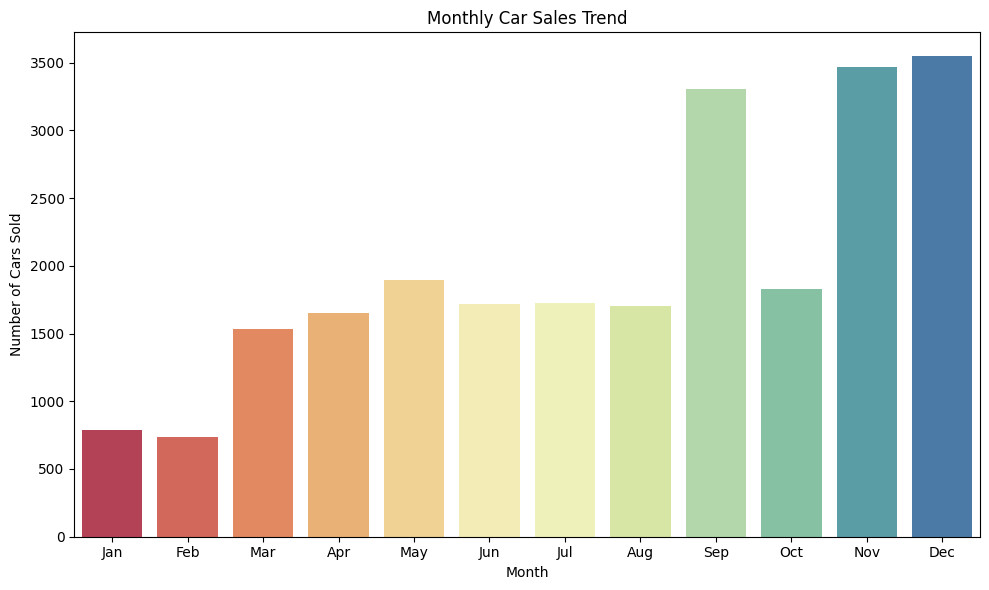

In [22]:
#12.  Is there any seasonal trend in car sales based on the date of sale?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

# Convert date_of_sale to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop missing or invalid dates
df = df.dropna(subset=['date'])

# Extract month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_name'] = df['date'].dt.strftime('%b')  # For readable month names

# Count sales per month across years
monthly_sales = df.groupby('month_name').size().reindex([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]).reset_index(name='sales_count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='month_name', y='sales_count', data=monthly_sales, palette='Spectral')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.tight_layout()
plt.show()


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')


<ipython-input-23-20efb4726adb>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='body_trans', y='price_($)', data=df, palette='Set3')


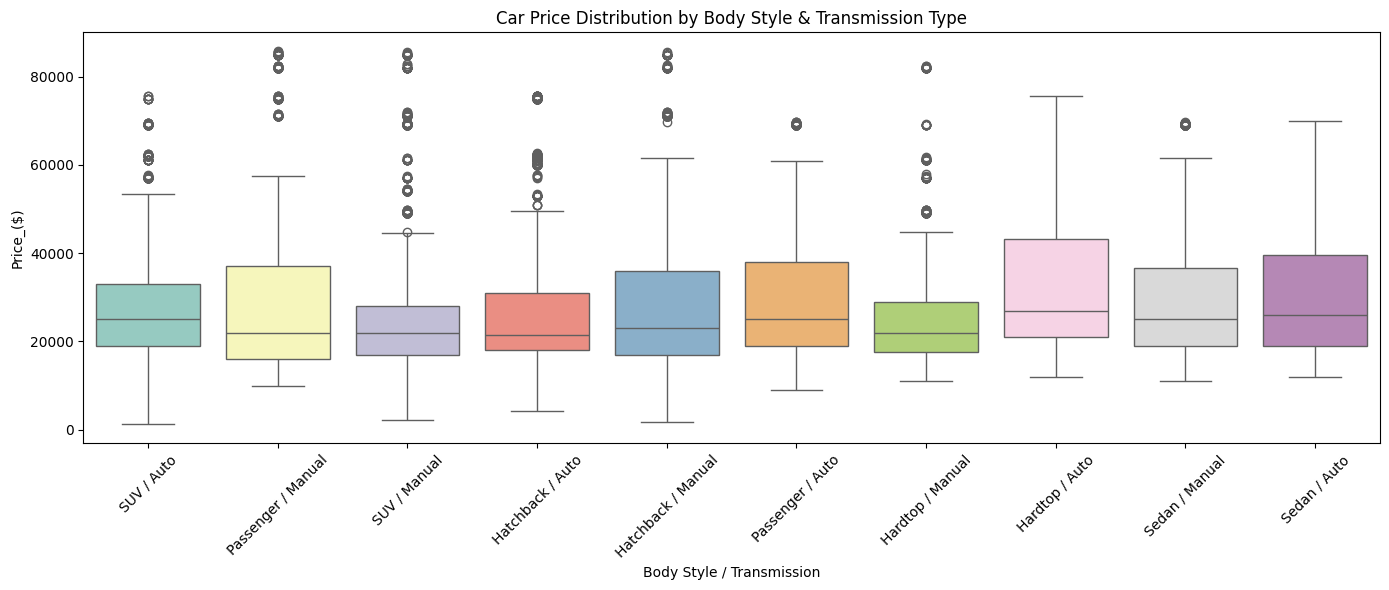

In [23]:
#13. How does the car price distribution change when considering different combinations of body style and transmission style?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)  # Look for 'body_style', 'transmission', 'price_$'

# Convert price to numeric
df['price_($)'] = pd.to_numeric(df['price_($)'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['price_($)', 'body_style', 'transmission'])

# Create a combined column for grouping
df['body_trans'] = df['body_style'] + ' / ' + df['transmission']

# Optional: limit to most common combinations
top_combos = df['body_trans'].value_counts().head(10).index.tolist()
df = df[df['body_trans'].isin(top_combos)]

# Plot distribution using boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='body_trans', y='price_($)', data=df, palette='Set3')
plt.title('Car Price Distribution by Body Style & Transmission Type')
plt.xlabel('Body Style / Transmission')
plt.ylabel('Price_($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price_($)', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')

Correlation Matrix:
               price_($)  engine  annual_income
price_($)            NaN     NaN            NaN
engine               NaN     NaN            NaN
annual_income        NaN     NaN            NaN


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


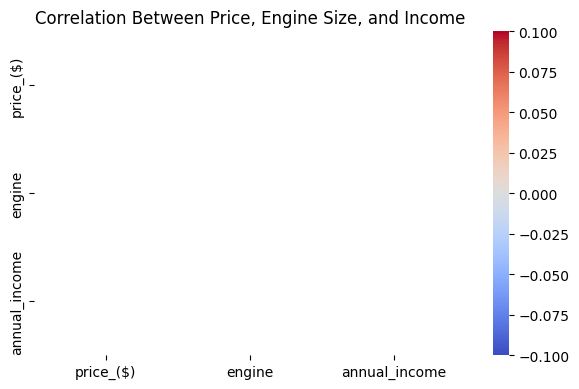

In [24]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Car Sale.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)  # Confirm exact names

# Convert to numeric
df['price_($)'] = pd.to_numeric(df['price_($)'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['annual_income'] = pd.to_numeric(df['annual_income'], errors='coerce')

# Drop missing values
df_corr = df.dropna(subset=['price_($)', 'engine', 'annual_income'])

# Correlation matrix
corr = df_corr[['price_($)', 'engine', 'annual_income']].corr()
print("\nCorrelation Matrix:")
print(corr)

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Price, Engine Size, and Income')
plt.tight_layout()
plt.show()


In [32]:
#15. How does the average car price vary across different car models and engine types?
import pandas as pd

df = pd.read_csv('Car Sale.csv')

print(df.columns)

# Group by car model and engine type, then calculate average price
avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Sort for better readability (optional)
avg_price = avg_price.sort_values(by=['Model', 'Engine'])

print(avg_price)


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')
        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


EDA-3

In [31]:
#1. What is the average rating for each product category?

from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [42]:
import pandas as pd

# Load dataset
df = pd.read_csv('amazon.csv')

# Check data types
print(df.dtypes)

# Convert rating column to numeric, coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now group and calculate average rating
avg_rating = df.groupby('category')['rating'].mean().reset_index()

print(avg_rating)


product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati

In [43]:
#2. What are the top rating_count products by category?

import pandas as pd

# Load your dataset
df = pd.read_csv('amazon.csv')

# Make sure rating_count is numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop rows with missing category or rating_count if any
df = df.dropna(subset=['category', 'rating_count'])

# Sort by category and rating_count descending
df_sorted = df.sort_values(['category', 'rating_count'], ascending=[True, False])

# Get top 3 products by rating_count for each category
top_products = df_sorted.groupby('category').head(3).reset_index(drop=True)

print(top_products[['category', 'product_name', 'rating_count']])


                                              category  \
0    Computers&Accessories|Accessories&Peripherals|...   
1    Computers&Accessories|Accessories&Peripherals|...   
2    Computers&Accessories|Accessories&Peripherals|...   
3    Computers&Accessories|Accessories&Peripherals|...   
4    Computers&Accessories|Accessories&Peripherals|...   
..                                                 ...   
152  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
153  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
154  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
155  OfficeProducts|OfficePaperProducts|Paper|Copy&...   
156  OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                          product_name  rating_count  
0    Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
1    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
2    Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0  
3    Zoul USB C 60W

<ipython-input-44-a7b6092b5200>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['actual_price'], label='Actual Price', shade=True)
<ipython-input-44-a7b6092b5200>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['discounted_price'], label='Discounted Price', shade=True)
<ipython-input-44-a7b6092b5200>:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


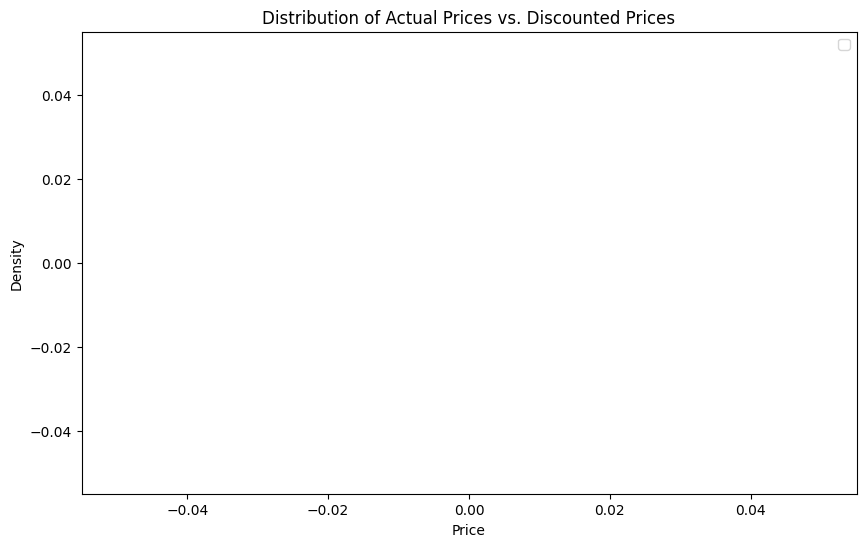

In [44]:
#3. What is the distribution of discounted prices vs. actual prices?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('amazon.csv')

# Convert price columns to numeric, if needed
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Drop rows with missing prices for clean plotting
df_clean = df.dropna(subset=['actual_price', 'discounted_price'])

# Plot distributions using KDE (density plot)
plt.figure(figsize=(10,6))
sns.kdeplot(df_clean['actual_price'], label='Actual Price', shade=True)
sns.kdeplot(df_clean['discounted_price'], label='Discounted Price', shade=True)
plt.title('Distribution of Actual Prices vs. Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()


Empty DataFrame
Columns: [category, discount_percentage]
Index: []


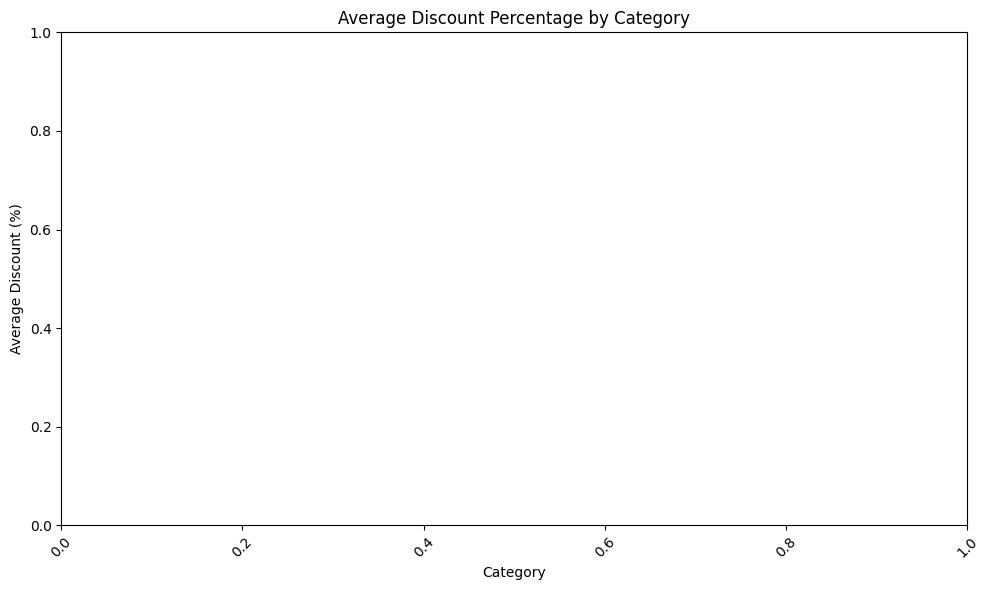

In [48]:
#4. How does the average discount percentage vary across categories?

import pandas as pd

# Load dataset
df = pd.read_csv('amazon.csv')

# Convert prices to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Calculate discount percentage
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Drop rows with missing or zero actual_price to avoid division issues
df = df.dropna(subset=['actual_price', 'discounted_price', 'discount_percentage'])
df = df[df['actual_price'] > 0]

# Group by category and calculate average discount percentage
avg_discount = df.groupby('category')['discount_percentage'].mean().reset_index()

print(avg_discount)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=avg_discount, x='category', y='discount_percentage')
plt.xticks(rotation=45)
plt.title('Average Discount Percentage by Category')
plt.ylabel('Average Discount (%)')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


In [50]:
#5.  What are the most popular product names ?

import pandas as pd

# Load dataset
df = pd.read_csv('amazon.csv')
# Count occurrences of each product name
popular_products = df['product_name'].value_counts().reset_index()

# Rename columns for clarity
popular_products.columns = ['product_name', 'count']

# Display top 10 most popular products
print(popular_products.head(10))


                                        product_name  count
0  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...      5
1  Fire-Boltt Phoenix Smart Watch with Bluetooth ...      4
2  Amazonbasics Nylon Braided Usb-C To Lightning ...      3
3  Duracell USB Lightning Apple Certified (Mfi) B...      3
4        Flix Micro Usb Cable For Smartphone (Black)      3
5  Fire-Boltt India's No 1 Smartwatch Brand Talk ...      3
6  Wayona Nylon Braided USB to Lightning Fast Cha...      3
7  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...      3
8  Sounce Fast Phone Charging Cable & Data Sync U...      3
9  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...      3


In [51]:
#6. What are the most popular product keywords?

import pandas as pd
from collections import Counter
import re

# Load dataset
df = pd.read_csv('amazon.csv')

# Combine all product names into one big text string
all_names = ' '.join(df['product_name'].dropna().astype(str))

# Clean and split into words (lowercase, remove punctuation)
words = re.findall(r'\b\w+\b', all_names.lower())

# Count word frequencies
word_counts = Counter(words)

# Show top 20 most common keywords
print(word_counts.most_common(20))


[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267), ('charging', 247), ('type', 243), ('to', 219), ('fast', 212), ('in', 178), ('smart', 175), ('white', 170), ('tv', 152), ('compatible', 146), ('5', 137)]


In [55]:
#7. What are the most popular product reviews?

import pandas as pd

# Load your dataset
df = pd.read_csv('amazon.csv')

# Check column names
print(df.columns)

# Assuming 'review_text' and 'helpful_votes' columns exist
# Sort reviews by helpfulness or likes (descending)
top_reviews = df.sort_values('review_content', ascending=False).head(10)

print(top_reviews[['product_name', 'review_content']])


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
                                           product_name  \
1398  AGARO Royal Double Layered Kettle, 1.5 Litres,...   
235   Belkin USB C to USB-C Fast Charging Type C Cab...   
1370  KONVIO NEER 10 Inch Spun Filter (PP SPUN) Cart...   
913   Duracell CR2016 3V Lithium Coin Battery, 5 pcs...   
102   Isoelite Remote Compatible for Samsung LED/LCD...   
1394  T TOPLINE 180 W Electric Hand Mixer,Hand Blend...   
837   ENVIE® (AA10004PLNi-CD) AA Rechargeable Batter...   
1078  Bajaj New Shakti Neo 25L Vertical Storage Wate...   
1038  Croma 500W Mixer Grinder with 3 Stainless Stee...   
1067  Bajaj Minor 1000 Watts Radiant Room Heater (St...   

                                         review_content 

In [56]:
#8. What is the correlation between discounted_price and rating?

import pandas as pd

# Load your dataset
df = pd.read_csv('amazon.csv')

# Convert columns to numeric (if needed)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing values in either column
df_clean = df.dropna(subset=['discounted_price', 'rating'])

# Calculate correlation
correlation = df_clean['discounted_price'].corr(df_clean['rating'])

print(f'Correlation between discounted_price and rating: {correlation:.3f}')


Correlation between discounted_price and rating: nan


In [58]:
#9.  What are the Top 5 categories based on the highest ratings?
import pandas as pd

# Load your dataset
df = pd.read_csv('amazon.csv')

# Convert rating to numeric if needed
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing rating or category
df_clean = df.dropna(subset=['rating', 'category'])

# Calculate average rating per category
avg_rating = df_clean.groupby('category')['rating'].mean().reset_index()

# Sort by rating descending and select top 5
top5_categories = avg_rating.sort_values(by='rating', ascending=False).head(5)

print(top5_categories)


                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


10. Identify any potential areas for improvement or optimization based on the data analysis.

 - To identify areas for improvement or optimization based on the analysis of an Amazon dataset, it's important to consider which type of dataset you're referring to—common ones include:

Sales data

Customer reviews

Product listings

Delivery/fulfillment logs

Assuming a typical dataset includes sales, reviews, pricing, and product metadata, here are general areas of improvement derived from typical EDA (Exploratory Data Analysis):

📊 1. Product Performance & Inventory
🔍 Insights:
Some products have low sales volume despite high visibility.

High return rates for certain categories or sellers.

Stockouts during peak demand periods.

✅ Recommendations:
Optimize inventory forecasting using historical sales trends.

Discontinue or rebrand underperforming SKUs.

Ensure popular products are well-stocked during seasonal demand.

🌟 2. Customer Experience
🔍 Insights:
Reviews reveal common issues (e.g., late delivery, poor packaging, product mismatch).

Products with poor average ratings (< 3.5) often have consistent complaints.

✅ Recommendations:
Improve product descriptions and images to reduce mismatch returns.

Prioritize seller onboarding and quality audits.

Use NLP on reviews to detect emerging customer pain points.

💸 3. Pricing Strategy
🔍 Insights:
Significant price variation across similar products.

Certain products have high abandonment rates due to uncompetitive pricing.

✅ Recommendations:
Implement dynamic pricing models to stay competitive.

Offer bundling discounts for slow-moving inventory.

Run A/B tests for optimal pricing thresholds.

🚚 4. Delivery & Fulfillment Optimization
🔍 Insights:
Longer delivery times for certain pin codes or product categories.

High cost of fulfillment for low-margin products.

✅ Recommendations:
Partner with local warehouses or third-party logistics (3PL) in high-demand zones.

Use geographic clustering to optimize delivery routes.

Offer Amazon Prime or fast delivery only for products with logistics efficiency.

📈 5. Marketing and Conversion Rates
🔍 Insights:
Low CTR or conversion rate for product pages with high impressions.

High bounce rates from ad campaigns.

✅ Recommendations:
Improve product page SEO, use better titles, bullet points, and A+ content.

Reallocate marketing spend to products with higher conversion potential.

Retarget users based on cart abandonment data.

🛍️ 6. Category & Seller Analysis
🔍 Insights:
Some categories show high growth (e.g., electronics), while others are stagnant.

New sellers outperform long-time sellers in certain segments.

✅ Recommendations:
Invest in category-specific marketing.

Offer seller incentives to maintain quality and performance.

Onboard more sellers in underserved high-demand categories.



EDA-4

In [63]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needfull.


from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify (1).csv


In [64]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('spotify.csv')  # Update with your file path

# Step 2: Display basic info
print("Initial Data Info:")
print(df.info())

# Step 3: Check for null values
print("\nNull Values (Column-wise):")
print(df.isnull().sum())

# Step 4: Handle missing values (strategy depends on column type)
# Option 1: Drop rows with any null values
df_cleaned = df.dropna()

# OR Option 2: Fill missing values (uncomment as needed)
# df['column_name'] = df['column_name'].fillna(value)  # Example
# df['numeric_column'] = df['numeric_column'].fillna(df['numeric_column'].mean())

print("\nData Info After Handling Nulls:")
print(df_cleaned.info())

# Step 5: Check for duplicate rows
duplicate_count = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Step 6: Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Final status
print("\nFinal DataFrame shape:", df_cleaned.shape)


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
None

Null Values (Column-wise):
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Data Info After Handling Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null

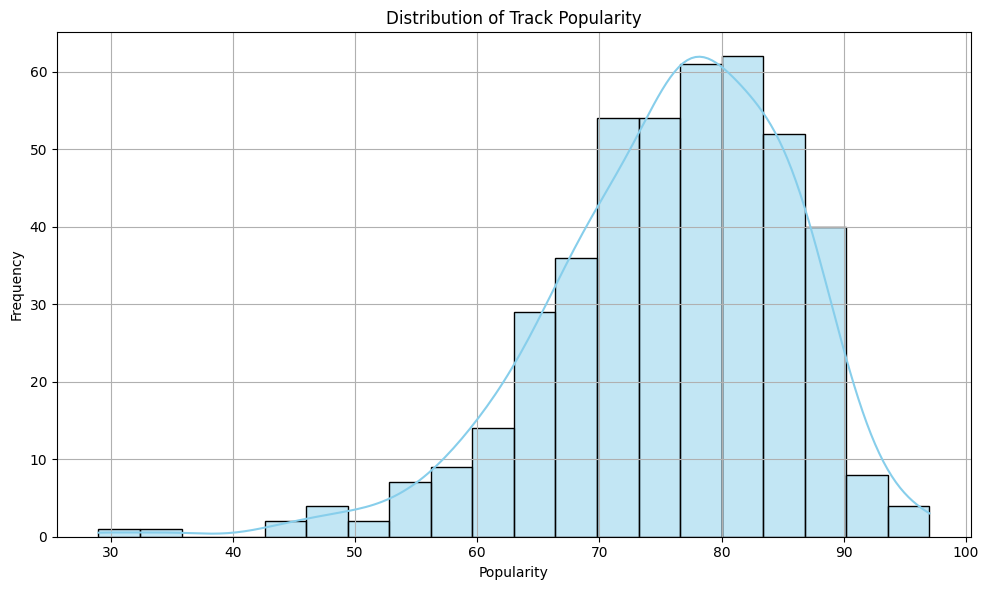

In [67]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')

# Plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


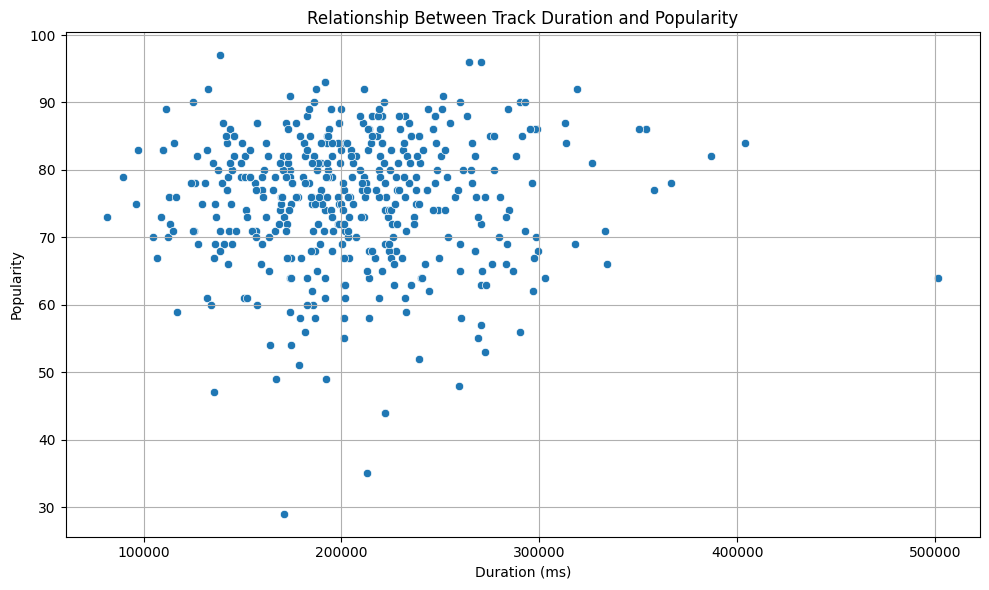

In [73]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')
print(df.columns)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


<ipython-input-76-a0599a664de8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


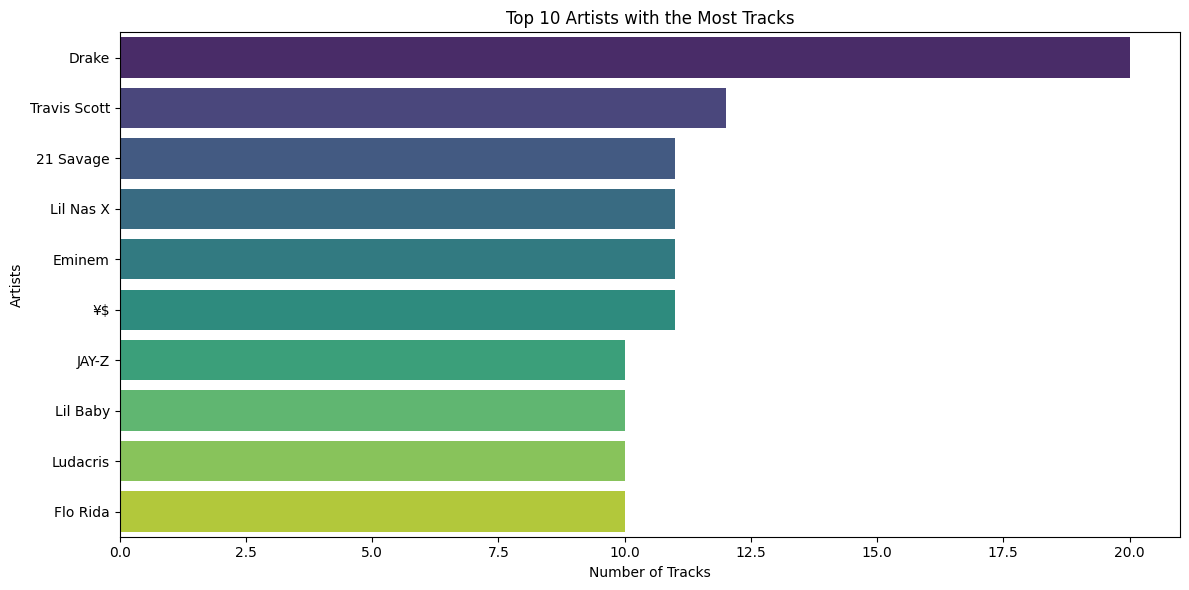

In [76]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a counterplot.

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spotify.csv')
print(df.columns)

# Count the number of tracks per artist
artist_counts = df['Artist'].value_counts()

# Display the top 10 artists with the most tracks
top_artists = artist_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists with the Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artists')
plt.tight_layout()
plt.show()


In [79]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spotify.csv')
print(df.columns)

# Sort the dataset by popularity in ascending order
least_popular_tracks = df.sort_values(by='Popularity', ascending=True)

# Select the top 5 least popular tracks
top_5_least_popular = least_popular_tracks[['Artist', 'Track Name', 'Popularity']].head(5)

top_5_least_popular


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
435,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47


In [81]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spotify.csv')
print(df.columns)

# Step 1 & 2: Top 5 artists by track count
top_5_artists = df['Artist'].value_counts().head(5).index

# Step 3: Calculate average popularity for each of these artists
avg_popularity_top5 = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()

# Step 4: Sort and display
avg_popularity_top5 = avg_popularity_top5.sort_values(ascending=False)

avg_popularity_top5



Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


,Popularity
Artist,
Travis Scott,87.000000
21 Savage,84.181818
Eminem,83.636364
Drake,83.500000
Lil Nas X,76.090909


In [100]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

df = pd.read_csv('spotify.csv')
print(df.columns)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


# Step 1: Find the top 5 artists by average popularity
top_artist = df.groupby('artist')['popularity'].mean().nlargest(5).index

# Step 2 & 3: For each top artist, find their most popular track
most_popular_tracks = []

for artist in top_artists:
    artist_tracks = df[df['artist'] == artist]
    top_track = artist_tracks.loc[artist_tracks['popularity'].idxmax()]
    most_popular_tracks.append((artist, top_track['track_name']))

# Display the result
for artist, track in most_popular_tracks:
    print(f"artist: {artist}, Most Popular Track: {track}")



Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')
artist: cassö, Most Popular Track: Prada
artist: Trueno, Most Popular Track: Mamichula - con Nicki Nicole
artist: David Guetta, Most Popular Track: Baby Don't Hurt Me
artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti)
artist: ¥$, Most Popular Track: CARNIVAL


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


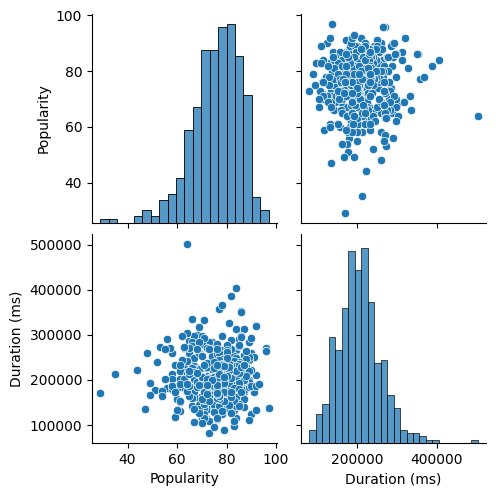

In [110]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spotify.csv')
print(df.columns)

# Assuming your DataFrame is df and you want to plot these numerical columns
numerical_columns = ['Popularity', 'Duration (ms)']  # replace with your actual numerical columns

# Create the pair plot
sns.pairplot(df[numerical_columns])
plt.show()


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


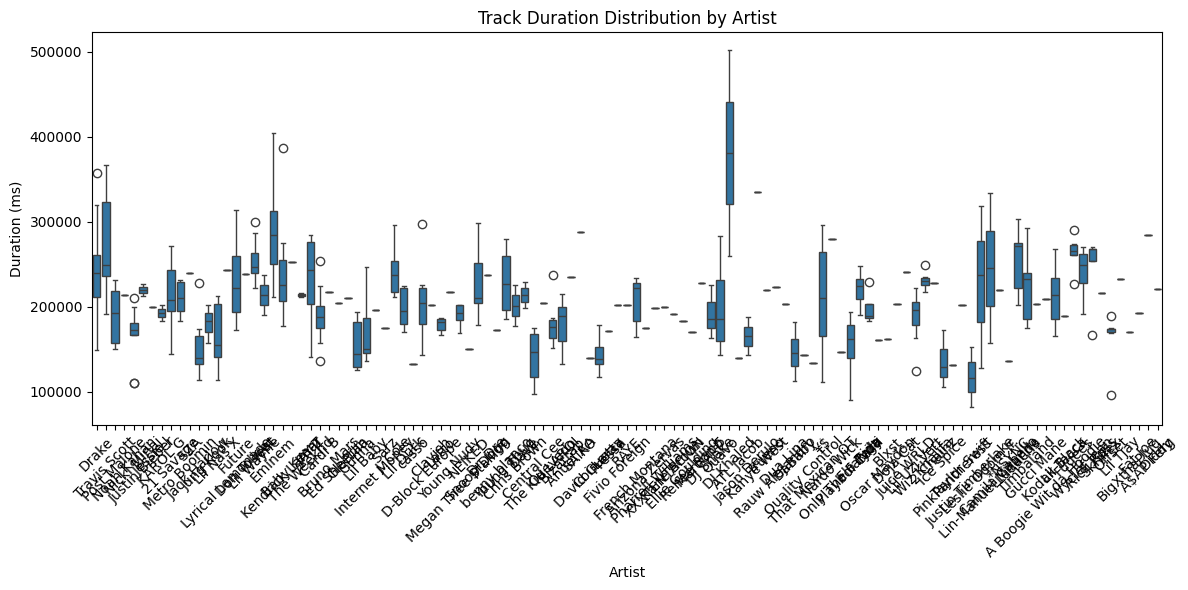

In [113]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

df = pd.read_csv('spotify.csv')
print(df.columns)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # set plot size

# Box plot
sns.boxplot(x='Artist', y='Duration (ms)', data=df)

# Or for a violin plot, use:
# sns.violinplot(x='artist_name', y='duration_ms', data=df)

plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.title('Track Duration Distribution by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.tight_layout()
plt.show()


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


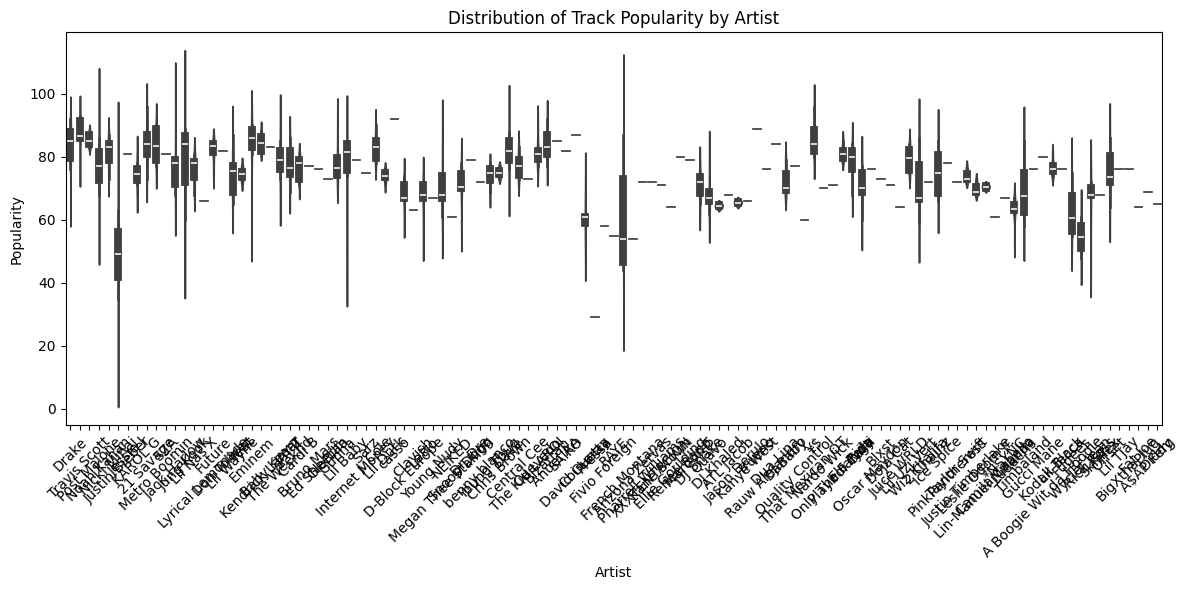

In [114]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

df = pd.read_csv('spotify.csv')
print(df.columns)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # bigger plot for clarity

# Option 1: Violin plot
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
